# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Print dataframe head: top 5 observations
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


##  Q1. Is the distribution of body temperatures normal? ##

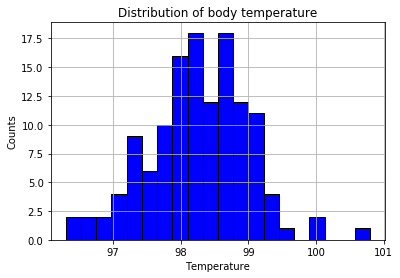

In [3]:
df.temperature.hist(bins=20, facecolor='blue', edgecolor='black')
plt.title('Distribution of body temperature')
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.show()

We noticed that distribution of body temperature is quite normal shape. However, it shows a bimodal type of characteristics with two peaks. More statistical way to confirm this is that we can compute test of normality!

In [4]:
sp.mstats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

H0: distribution of data is not normal. 
Ha: distribution of data is normal

The p-value (0.25) of normality test indicates that the null hypothesis here is failing.
Meaning that the distribution of body temperature does fit normal distribution!

## Q2. Is the sample size large enough? Are observations independent? ##
According to a condition for the Central Limit Theorem, the minimum sample size of observations must be 30.

In [5]:
len(df.temperature)

130

Since the length of observations is 130, the sample size qualified CLT condition.

Thus, we can apply z-statistics (z-score) for hypothesis testing.
The sample is a good representation of population with a normal distribution

## Q3. Is the true population mean really 98.6 degress F? ##
Try a boostrap hypothesis test
Next, try a frequentist statistical testing. Would you use one-sample or two-sampl test? Why?
Is it appropriate to use the t or z statistics? 
Now using the other test, how result will be different? Why?

* H0: The true population mean of temperature is 98.6 degrees F.
* Ha: The true population mean of temperature is not 98.6 degrees F.

In [6]:
true_mean = 98.6
sample_mean = np.mean(df['temperature'])
sample_std = np.std(df['temperature'])
sample_sem = sample_std/np.sqrt(len(df))

sample_mean, sample_std, sample_sem

(98.24923076923078, 0.7303577789050377, 0.064056614695193359)

We obtained sample mean, standard deviation and standard error of mean. Let's check how many standard deviation is sample mean away from true mean of 98.6 degrees F.

In [7]:
z = (true_mean -  sample_mean)/sample_sem
z

5.4759252020781162

### Computed z-score is 5.47 ###

In [8]:
p = (1 - sp.norm.cdf(z))*2
p

4.3523151749269573e-08

### p-value is extremely small than < 0.05 ####. 
* We can reject the null hypothesis that true population mean of body temperature is 98.6 degrees F.
* We are using one-sample test for this situation. It is because we are comparing the sample mean to a known value of mean (98.6) body temperature for comparison. Thus, trying to identify or confirm whether the mean body temperature is 98.6 F.
* In this scenario, it is better to use z-stat since the central limit theorem condition for sample size is qualified (n >= 30).

## Applying t-statistics ##
We are interested in checking if the p-value on both side of tails is significant. Let's test with two-tailed test.

In [9]:
t = z
t

5.4759252020781162

In [10]:
(1 - sp.t.cdf(t, len(df)-1))*2

2.1887464640713006e-07

The p-value obtained from two-tailed t-test indicates that p-value is extremely small. Thus, it is significant. The null hypothesis of true mean body temperature being 98.6 degrees F is also rejected here as well.

## Q4. Draw a sample size of 10 from data and repeat both tests ##
* Which one is correct one to use?
* What do you notice? 
* What does this tell you differnce in application of t-test vs. z-test?

In [11]:
# Bootstrap Sample: one sample #
###############################################################################
def bootstrap_replicate_1d(data,func):
    return func(np.random.choice(data, size=len(data)))

# Bootstrap statistics: by sample #
def draw_bs_reps(data,func,size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,np.mean)
    
    return bs_replicates
###############################################################################
# Compute t-statistics:
bs_replicates_mean = draw_bs_reps(df.temperature, np.mean, size=10)
p1 = np.sum(bs_replicates_mean <= 98.6)/10
print('p-value:', p1)

# Compute standard deviation:
bs_replicates_std = draw_bs_reps(df.temperature, np.std, size=10)
bs_replicates_sem = bs_replicates_std/np.sqrt(10)

# Compute z-statistics:
z2 = (true_mean - bs_replicates_mean)/bs_replicates_sem
z2

p2 = (1 - sp.norm.cdf(z2))*2
print('p-value:', p2)

p-value: 1.0
p-value: [ 0.99030707  0.992789    0.99345926  0.99419371  0.98979508  0.99132506
  0.98742533  0.9903557   0.99245818  0.99035306]


## Q5. At what temperature should we consider someone's temperature to be "abnormal"? ##
* Try calculating using the bootstrap approach as well as frequentist test approach.
* Start by computing margin of errors and confidence interval.
* Should use appropriate formula for one draw and not N draws.

In [12]:
## Bootstrap body temperature with sample size = 130 ##
bs_reps = []
for i in range(100):
    sample = np.random.choice(df.temperature, size=130)
    bs_reps.append(sample)

# Compute bootstrap mean, std.dev and sem:
bs_mean = np.mean(bs_reps) 
bs_std = np.std(bs_reps)
bs_sem = bs_std/np.sqrt(130)
    
# bootstrap approach: z-statistics #
z0 = sp.norm.ppf(0.975) # 95% Confidence Interval of mean body temp.

# Calculate lower and upper bound of C.I:
upper_temp = bs_mean + z0*bs_sem
lower_temp = bs_mean - z0*bs_sem

# Confidence Interval of 95%:
print(lower_temp, upper_temp)

98.114966052 98.3680954865


In [13]:
# frequentist approach: z-statistics #
z1 = sp.norm.ppf(0.975) # 95% Confidence Interval of mean body temp.

# Calculate lower and upper bound of C.I:
upper_temp = sample_mean + z1*sample_sem
lower_temp = sample_mean - z1*sample_sem

# Compute margin of errors:
margin_error = z1*sample_sem
print(margin_error*100)

# Confidence Interval of 95%:
print(lower_temp, upper_temp)

12.5548657774
98.1236821115 98.374779427


### Conclusion ###
From above results, we are 95% confident that true mean is somewhere between 98.123 and 98.375
Thus, human body temperature falls below 98.124 and above 98.375 will be considered abnormal temperature.

## Q6. Is there a significant difference between males and females in normal temperature? ##
* What testing approach did you use and why?
* Write a story with your conclusion in context of the original problem

In [14]:
# Partition data into male and female:
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

# Check length of male and female observation counts:
len(df_male), len(df_female)

(65, 65)

In [15]:
# Compute temperature for male and female:
male_temp = df_male['temperature']
female_temp = df_female['temperature']

# Compue mean body temperature for male and female:
male_mean_temp = np.mean(male_temp)
male_std_temp = np.std(male_temp)
print(male_mean_temp, male_std_temp)

female_mean_temp = np.mean(female_temp)
female_std_temp = np.std(female_temp)
print(female_mean_temp, female_std_temp)

98.1046153846154 0.6933598841828696
98.39384615384613 0.7377464486428966


### Hypothesis Testing ###
* H0: the true mean body temperature of male and female is equal.
* Ha: the true mean body temperature of male and female is not equal.
The p-value of significance is alpha = 0.05;

In [16]:
# Compute mean difference and standard error of mean between male and female:
H0_mean = 0
mean_diff_temp = female_mean_temp - male_mean_temp
sem_diff_temp = np.sqrt(((female_std_temp**2)/len(female_temp)) + ((male_std_temp**2)/len(male_temp)))
print(mean_diff_temp, sem_diff_temp)

# Compute z-score:
z = (mean_diff_temp - H0_mean)/sem_diff_temp
print(z)

# Compute p-value:
p = (1-sp.norm.cdf(z))*2
print(p)

0.289230769230727 0.125576685212
2.30322028919
0.0212664518301


## Conclusion ##
Obtained p-value from hypothesis test is 0.02 which is smaller than p-value of significance.
Thus, we reject the null hypothesis. In other words, **true mean body temperature of male and female is not EQUAL!**

## EDA Summary on Human Body Temperature ##
1. The body temperature distribution is normal and validated with test of normality.
2. The human body temperatures are statistically independent.
3. 95% of confidence interval confirmed that the mean body temperature is not 98.6 degrees F. This is validated with hypothesis test and z-statistics. 
4. z-statistics and t-statistics yield similar results for sample size greater than 30 as stated in Central Limit Theorem.
5. Male and female body temperature are significantly different from each other!